<a href="https://colab.research.google.com/github/nchaubey12/NeuralMET/blob/TejasHypothesis/nueramet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [502]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [503]:
## Loading datasets.

file_path = '../dataframe/jobs_in_data.csv'
df = pd.read_csv(file_path)
df.head(20)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization
3,2024,Senior,Full-time,Data Architect,171210,USD,171210,Canada,In-person,Canada,M,Data Architecture and Modeling
4,2024,Senior,Full-time,Data Architect,92190,USD,92190,Canada,In-person,Canada,M,Data Architecture and Modeling
5,2024,Mid-level,Full-time,Data Science,46203,GBP,57753,United Kingdom,In-person,United Kingdom,M,Data Science and Research
6,2024,Mid-level,Full-time,Data Science,38280,GBP,47850,United Kingdom,In-person,United Kingdom,M,Data Science and Research
7,2024,Entry-level,Full-time,Insight Analyst,50000,USD,50000,United States,Remote,United States,M,Data Analysis
8,2024,Entry-level,Full-time,Insight Analyst,40000,USD,40000,United States,Remote,United States,M,Data Analysis
9,2024,Senior,Full-time,Data Engineer,276000,USD,276000,United States,In-person,United States,M,Data Engineering


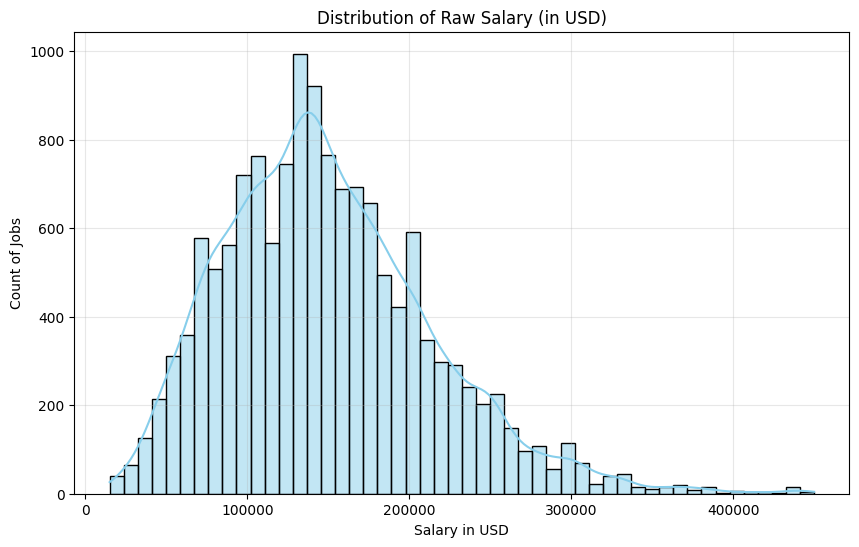

In [504]:
# Visualizing the distribution of the primary numerical variable (Salary)
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Raw Salary (in USD)')
plt.xlabel('Salary in USD')
plt.ylabel('Count of Jobs')
plt.ticklabel_format(style='plain', axis='x')
plt.grid(alpha=0.3)
plt.show()


#### INSIGHT: The long tail shows the data is highly skewed right, confirming the need for outlier analysis and potentially using the median.

In [505]:
# checking the infromation of the dataset.
print(df.columns)
print(df.shape)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'work_setting', 'company_location', 'company_size', 'job_category'],
      dtype='object')
(14199, 12)


In [506]:
# checking the missing values of the dataset.
print("---Missing Values per column---")
print(df.isnull().sum())

---Missing Values per column---
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
work_setting          0
company_location      0
company_size          0
job_category          0
dtype: int64


In [507]:
# checking the Data Types of the dataset.
print("\n Data Types of each column--- ")
print(df.dtypes)
df.info()


 Data Types of each column--- 
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
work_setting          object
company_location      object
company_size          object
job_category          object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14199 entries, 0 to 14198
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14199 non-null  int64 
 1   experience_level    14199 non-null  object
 2   employment_type     14199 non-null  object
 3   job_title           14199 non-null  object
 4   salary              14199 non-null  int64 
 5   salary_currency     14199 non-null  object
 6   salary_in_usd       14199 non-null  int64 
 7   employee_residence  14199 non-null  object
 8   work_setting

In [508]:
# checking the Duplicate Rows in  the dataset.
print("\n ---Number of Duplicate Rows---")
print(df.duplicated().sum())


 ---Number of Duplicate Rows---
5493


In [509]:
# 1. checking the Unique years
print("Unique work_year values:")
print(df['work_year'].unique())

# 2. Counts of each year
print("\nCounts of work_year:")
print(df['work_year'].value_counts())


Unique work_year values:
[2024 2023 2022 2020 2021]

Counts of work_year:
work_year
2023    8485
2024    3811
2022    1635
2021     197
2020      71
Name: count, dtype: int64


In [510]:
#  checking the Unique  values .
print(df['employee_residence'].unique()[:20])
print(df['company_location'].unique()[:20])
print(df['employment_type'].unique())


['United Kingdom' 'United States' 'Canada' 'Lithuania' 'Poland' 'France'
 'Germany' 'Saudi Arabia' 'India' 'Australia' 'United Arab Emirates'
 'Ukraine' 'Netherlands' 'Egypt' 'Austria' 'Spain' 'Philippines' 'Finland'
 'Türkiye' 'Switzerland']
['United Kingdom' 'United States' 'Canada' 'Lithuania' 'Poland' 'France'
 'Germany' 'Saudi Arabia' 'Australia' 'United Arab Emirates' 'Ukraine'
 'Netherlands' 'Egypt' 'Austria' 'Spain' 'Philippines' 'Finland' 'Türkiye'
 'Switzerland' 'Oman']
['Freelance' 'Full-time' 'Contract' 'Part-time']


In [511]:
# checking the Unique values in respective columns
for col in df.select_dtypes(include='object').columns:
    print(col, df[col].nunique())
    print(df[col].unique()[:20])
    print("------")


experience_level 4
['Entry-level' 'Executive' 'Senior' 'Mid-level']
------
employment_type 4
['Freelance' 'Full-time' 'Contract' 'Part-time']
------
job_title 149
['Applied Data Scientist' 'Business Intelligence' 'Data Architect'
 'Data Science' 'Insight Analyst' 'Data Engineer' 'Research Scientist'
 'Business Intelligence Analyst' 'Analytics Engineer' 'Data Scientist'
 'Research Engineer' 'BI Developer' 'Data Analyst'
 'Business Intelligence Engineer' 'Data Quality Engineer'
 'Machine Learning Engineer' 'Cloud Database Engineer' 'Head of Data'
 'BI Analyst' 'Data Manager']
------
salary_currency 12
['USD' 'GBP' 'EUR' 'CAD' 'CHF' 'NZD' 'AUD' 'PLN' 'BRL' 'TRY' 'SGD' 'DKK']
------
employee_residence 86
['United Kingdom' 'United States' 'Canada' 'Lithuania' 'Poland' 'France'
 'Germany' 'Saudi Arabia' 'India' 'Australia' 'United Arab Emirates'
 'Ukraine' 'Netherlands' 'Egypt' 'Austria' 'Spain' 'Philippines' 'Finland'
 'Türkiye' 'Switzerland']
------
work_setting 3
['Remote' 'In-person' 'Hy

In [512]:
# checking the row count of each year.
df['work_year'].value_counts().sort_index()


work_year
2020      71
2021     197
2022    1635
2023    8485
2024    3811
Name: count, dtype: int64

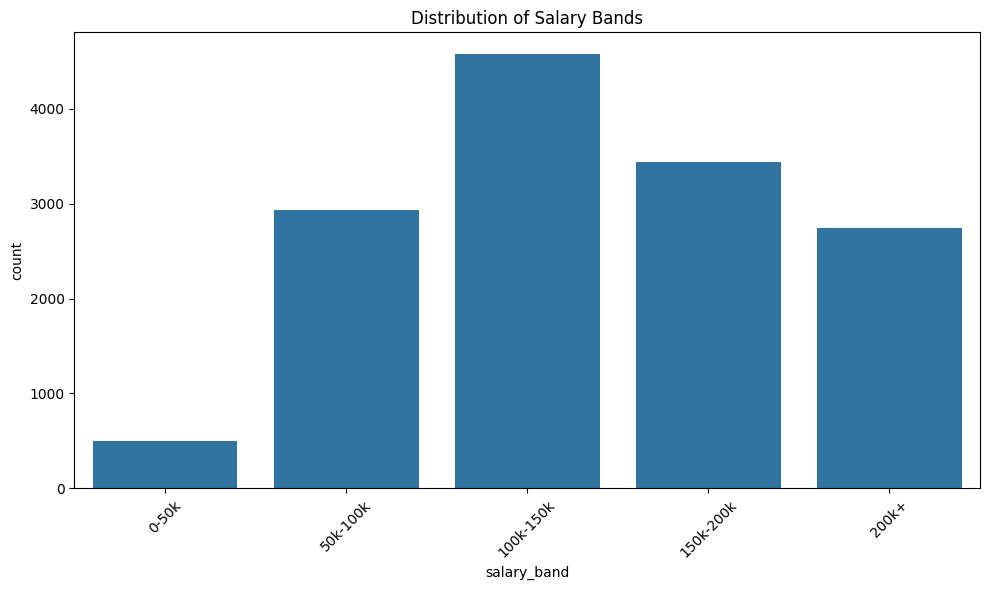

In [513]:
# plot
bins = [0, 50000, 100000, 150000, 200000, df.salary_in_usd.max()]
labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k+']

df['salary_band'] = pd.cut(df.salary_in_usd, bins=bins, labels=labels)
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='salary_band')
plt.title("Distribution of Salary Bands")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [514]:
# Dropping columns that are not required.
df.drop(['experience_level'], axis=1, inplace=True)
df.head(10)

,work_year,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category,salary_band
0,2024,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research,0-50k
1,2024,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization,200k+
2,2024,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization,150k-200k
3,2024,Full-time,Data Architect,171210,USD,171210,Canada,In-person,Canada,M,Data Architecture and Modeling,150k-200k
4,2024,Full-time,Data Architect,92190,USD,92190,Canada,In-person,Canada,M,Data Architecture and Modeling,50k-100k
5,2024,Full-time,Data Science,46203,GBP,57753,United Kingdom,In-person,United Kingdom,M,Data Science and Research,50k-100k
6,2024,Full-time,Data Science,38280,GBP,47850,United Kingdom,In-person,United Kingdom,M,Data Science and Research,0-50k
7,2024,Full-time,Insight Analyst,50000,USD,50000,United States,Remote,United States,M,Data Analysis,0-50k
8,2024,Full-time,Insight Analyst,40000,USD,40000,United States,Remote,United States,M,Data Analysis,0-50k
9,2024,Full-time,Data Engineer,276000,USD,276000,United States,In-person,United States,M,Data Engineering,200k+


In [515]:
#Checking for outliers (using IQR method for numeric columns only)
print("\n=== Outlier Detection (IQR Method) ===")
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} potential outliers")


=== Outlier Detection (IQR Method) ===
work_year: 268 potential outliers
salary: 224 potential outliers
salary_in_usd: 261 potential outliers


In [ ]:
## checking the top 10 highest salary outliers.
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_rows = df[(df['salary_in_usd'] < lower_bound) | (df['salary_in_usd'] > upper_bound)]
outlier_rows.sort_values(by='salary_in_usd', ascending=False).head(10)

,work_year,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category,salary_band
14001,2020,Full-time,Research Scientist,450000,USD,450000,United States,In-person,United States,M,Data Science and Research,200k+
3362,2024,Full-time,Research Engineer,450000,USD,450000,United States,In-person,United States,M,Data Science and Research,200k+
1911,2024,Full-time,Head of Machine Learning,448000,USD,448000,United States,Remote,United States,M,Machine Learning and AI,200k+
1394,2024,Full-time,ML Engineer,440000,USD,440000,United States,In-person,United States,M,Machine Learning and AI,200k+
3406,2024,Full-time,Research Scientist,440000,USD,440000,United States,In-person,United States,M,Data Science and Research,200k+
2592,2024,Full-time,Research Engineer,440000,USD,440000,United States,In-person,United States,M,Data Science and Research,200k+
3555,2024,Full-time,Research Engineer,440000,USD,440000,United States,In-person,United States,M,Data Science and Research,200k+
3540,2024,Full-time,Research Scientist,440000,USD,440000,United States,In-person,United States,M,Data Science and Research,200k+
3281,2024,Full-time,Research Engineer,440000,USD,440000,United States,In-person,United States,M,Data Science and Research,200k+
1870,2024,Full-time,Research Engineer,440000,USD,440000,United States,In-person,United States,M,Data Science and Research,200k+


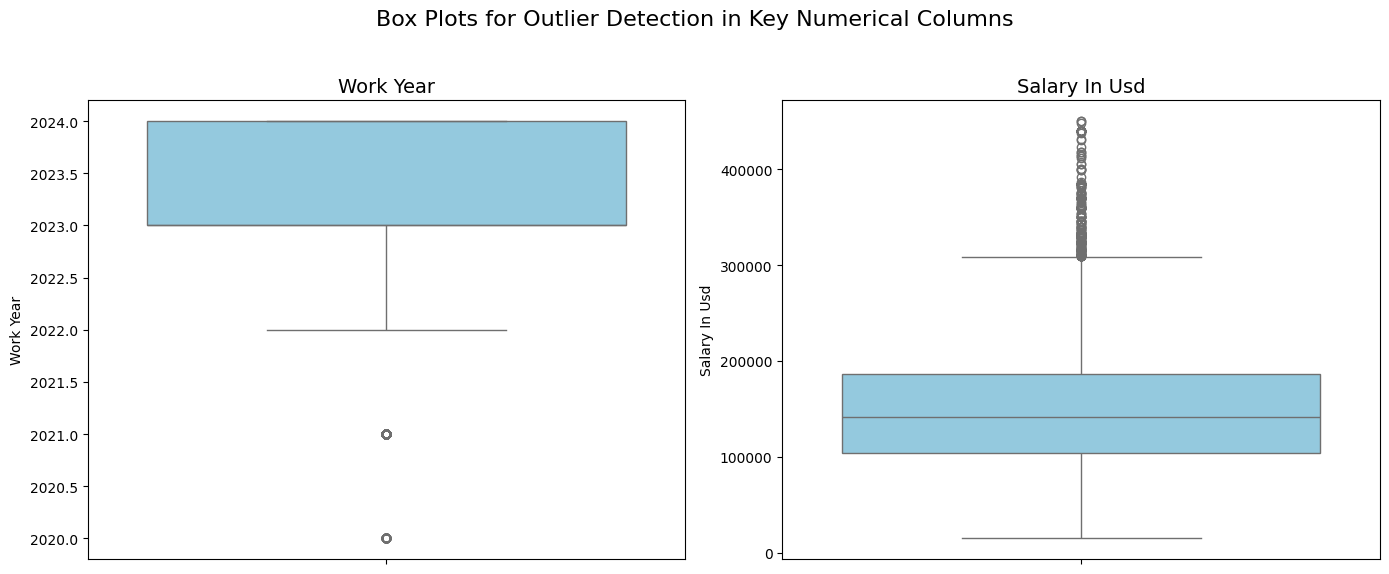

In [ ]:

## plot for checking outliners.
cols_to_plot = ['work_year', 'salary_in_usd']
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plt.suptitle('Box Plots for Outlier Detection in Key Numerical Columns', fontsize=16)

for i, col in enumerate(cols_to_plot):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col.replace("_", " ").title(), fontsize=14)
    axes[i].set_ylabel(col.replace("_", " ").title())

plt.tight_layout(rect=[0, 0.03, 1, 0.95])


In [518]:
# Inspecting top salaries
top50 = df.sort_values('salary_in_usd', ascending=False).head(50)
print("Top 50 salaries (salary_in_usd):")
display(top50[['work_year','job_title','company_location','company_size','salary_in_usd','salary_currency']])



Top 50 salaries (salary_in_usd):


,work_year,job_title,company_location,company_size,salary_in_usd,salary_currency
3362,2024,Research Engineer,United States,M,450000,USD
14001,2020,Research Scientist,United States,M,450000,USD
1911,2024,Head of Machine Learning,United States,M,448000,USD
3406,2024,Research Scientist,United States,M,440000,USD
3281,2024,Research Engineer,United States,M,440000,USD
110,2024,Research Engineer,United States,M,440000,USD
2592,2024,Research Engineer,United States,M,440000,USD
3338,2024,Research Engineer,United States,M,440000,USD
1870,2024,Research Engineer,United States,M,440000,USD
3382,2024,Research Scientist,United States,M,440000,USD


In [519]:
## Loading Second dataset.
df_1 = pd.read_csv(r'../dataframe/enterprise_gen_ai.csv')
df_1.head(10)

,Company Name,Industry,Country,GenAI Tool,Adoption Year,Number of Employees Impacted,New Roles Created,Training Hours Provided,Productivity Change (%),Employee Sentiment
0,Davis LLC Pvt. Ltd.,Healthcare,USA,Mixtral,2022,5277,8,657,25.2,"Productivity increased, but there's anxiety ab..."
1,"Roberts, Holland and Bradshaw Pvt. Ltd.",Telecom,South Africa,Claude,2023,18762,17,23021,27.5,"We now finish tasks faster, but some older emp..."
2,Roman Inc Pvt. Ltd.,Advertising,India,Gemini,2023,11307,17,4680,11.5,"Productivity increased, but there's anxiety ab..."
3,Nguyen-Strickland Pvt. Ltd.,Technology,UK,Groq,2023,18834,12,1750,7.0,"AI helped me reduce repetitive tasks, but lear..."
4,Jackson PLC Pvt. Ltd.,Hospitality,UK,LLaMA,2024,8364,22,3925,2.5,"Job roles have shifted a lot, which is both go..."
5,Forbes Ltd Pvt. Ltd.,Entertainment,Switzerland,Gemini,2022,16082,16,11485,19.9,New roles are exciting; transition was smoothe...
6,"Barker, Williams and Lynch Pvt. Ltd.",Telecom,South Africa,Mixtral,2022,994,11,2593,6.6,"Job roles have shifted a lot, which is both go..."
7,"Wheeler, Warner and Brown Pvt. Ltd.",Advertising,USA,Groq,2022,16429,16,11692,20.4,Collaboration improved; documentation and meet...
8,"Ramirez, Wells and Cochran Pvt. Ltd.",Technology,South Korea,Gemini,2022,12952,7,22484,29.5,There's concern that AI will replace some of u...
9,Morris Inc Pvt. Ltd.,Legal Services,Switzerland,ChatGPT,2022,4144,24,20689,33.3,I love using AI—it makes my job easier and mor...


In [520]:
df_1.columns

Index(['Company Name', 'Industry', 'Country', 'GenAI Tool', 'Adoption Year',
       'Number of Employees Impacted', 'New Roles Created',
       'Training Hours Provided', 'Productivity Change (%)',
       'Employee Sentiment'],
      dtype='object')

In [521]:
df_1.shape

(100000, 10)

In [522]:
print("=== Missing Values per Column ===")
print(df_1.isnull().sum())

=== Missing Values per Column ===
Company Name                    0
Industry                        0
Country                         0
GenAI Tool                      0
Adoption Year                   0
Number of Employees Impacted    0
New Roles Created               0
Training Hours Provided         0
Productivity Change (%)         0
Employee Sentiment              0
dtype: int64


In [ ]:
# Checking the data types
print("\n=== Data Types of Each Column ===")
print(df_1.dtypes)


=== Data Types of Each Column ===
Company Name                     object
Industry                         object
Country                          object
GenAI Tool                       object
Adoption Year                     int64
Number of Employees Impacted      int64
New Roles Created                 int64
Training Hours Provided           int64
Productivity Change (%)         float64
Employee Sentiment               object
dtype: object


In [524]:
# Checking for duplicate rows in the data
print("\n=== Number of Duplicate Rows ===")
print(df_1.duplicated().sum())


=== Number of Duplicate Rows ===
0


In [525]:
## To check the number of potential outliers
# Select numeric columns
numeric_cols = df_1.select_dtypes(include=['int64','float64']).columns

# IQR outlier detection
for col in numeric_cols:
    Q1 = df_1[col].quantile(0.25)
    Q3 = df_1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_1[(df_1[col] < lower_bound) | (df_1[col] > upper_bound)]
    print(f"{col}: {len(outliers)} potential outliers")

Adoption Year: 0 potential outliers
Number of Employees Impacted: 0 potential outliers
New Roles Created: 0 potential outliers
Training Hours Provided: 0 potential outliers
Productivity Change (%): 0 potential outliers


In [526]:
# Standardizing country fields (strip spaces, unify letter case)
df['company_location'] = df['company_location'].str.strip().str.title()
df_1['Country'] = df_1['Country'].str.strip().str.title()

In [527]:
# Checking unique job categories
print(df['job_category'].unique())

['Data Science and Research' 'BI and Visualization'
 'Data Architecture and Modeling' 'Data Analysis' 'Data Engineering'
 'Leadership and Management' 'Data Quality and Operations'
 'Machine Learning and AI' 'Cloud and Database'
 'Data Management and Strategy']


In [528]:
# Fixing country name mismatches
df_1['Country'] = df_1['Country'].replace({
    'Usa': 'United States',
    'Uk': 'United Kingdom'
})

In [529]:
# Fixing country name mismatches
df_1['Country'] = df_1['Country'].replace({
    'Usa': 'United States',
    'Uk': 'United Kingdom'
})

In [530]:
df_1.drop(
    ['company_name', 'Industry', 'GenAI Tool', 'Training Hours Provided', 'Employee Sentiment'],
    axis=1,
    inplace=True,
    errors='ignore'
)

In [531]:
df_1.columns

Index(['Company Name', 'Country', 'Adoption Year',
       'Number of Employees Impacted', 'New Roles Created',
       'Productivity Change (%)'],
      dtype='object')

In [532]:
df_1.drop(
    ['Company Name'],
    axis=1,
    inplace=True,
    errors='ignore'
)
df_1.head(10)

,Country,Adoption Year,Number of Employees Impacted,New Roles Created,Productivity Change (%)
0,United States,2022,5277,8,25.2
1,South Africa,2023,18762,17,27.5
2,India,2023,11307,17,11.5
3,United Kingdom,2023,18834,12,7.0
4,United Kingdom,2024,8364,22,2.5
5,Switzerland,2022,16082,16,19.9
6,South Africa,2022,994,11,6.6
7,United States,2022,16429,16,20.4
8,South Korea,2022,12952,7,29.5
9,Switzerland,2022,4144,24,33.3


In [533]:
df = df.rename(columns={
    'company_location': 'Country',
    'work_year': 'Adoption Year'
})

In [534]:
common_countries = set(df['Country']).intersection(set(df_1['Country']))
print(common_countries)

{'South Africa', 'Switzerland', 'Australia', 'India', 'Germany', 'Singapore', 'Canada', 'France', 'United Kingdom', 'Brazil', 'United States', 'Japan'}


In [ ]:
### Grouping Ai related jobs under one Job Type.
df_grouped = df.groupby(['Country', 'Adoption Year']).agg({
    'salary_in_usd': 'median'
}).reset_index()

df_grouped = df_grouped.rename(columns={
    'salary_in_usd': 'Median Salary'
})

df_grouped['Job Type'] = 'AI Related Job'

In [536]:
df_1_grouped = df_1.groupby(['Country', 'Adoption Year']).agg({
    'Number of Employees Impacted': 'median',
    'New Roles Created': 'median',
    'Productivity Change (%)': 'median'
}).reset_index()

In [ ]:
# Merging datasets to create final data for analysis.
df_final = pd.merge(
    df_1_grouped,
    df_grouped,
    on=['Country', 'Adoption Year'],
    how='inner'
)
df_final.head(26)

,Country,Adoption Year,Number of Employees Impacted,New Roles Created,Productivity Change (%),Median Salary,Job Type
0,Australia,2022,9695.0,15.0,18.7,83171.0,AI Related Job
1,Australia,2023,10018.0,16.0,18.3,128739.5,AI Related Job
2,Australia,2024,10411.0,16.0,18.4,105000.0,AI Related Job
3,Brazil,2022,9886.0,16.0,18.7,66000.0,AI Related Job
4,Brazil,2023,9718.0,16.0,18.3,60000.0,AI Related Job
5,Brazil,2024,10065.0,15.0,18.1,57000.0,AI Related Job
6,Canada,2022,10057.0,16.0,18.5,115661.0,AI Related Job
7,Canada,2023,10113.5,15.0,18.3,144700.0,AI Related Job
8,Canada,2024,9963.0,16.0,18.0,140000.0,AI Related Job
9,France,2022,10295.0,15.0,18.7,65141.0,AI Related Job


In [538]:
df_final.shape
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       32 non-null     object 
 1   Adoption Year                 32 non-null     int64  
 2   Number of Employees Impacted  32 non-null     float64
 3   New Roles Created             32 non-null     float64
 4   Productivity Change (%)       32 non-null     float64
 5   Median Salary                 32 non-null     float64
 6   Job Type                      32 non-null     object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.9+ KB


In [539]:
df_final.drop(
    ['Job Type'],
    axis=1,
    inplace=True,
    errors='ignore'
)
df_final.head(26)

,Country,Adoption Year,Number of Employees Impacted,New Roles Created,Productivity Change (%),Median Salary
0,Australia,2022,9695.0,15.0,18.7,83171.0
1,Australia,2023,10018.0,16.0,18.3,128739.5
2,Australia,2024,10411.0,16.0,18.4,105000.0
3,Brazil,2022,9886.0,16.0,18.7,66000.0
4,Brazil,2023,9718.0,16.0,18.3,60000.0
5,Brazil,2024,10065.0,15.0,18.1,57000.0
6,Canada,2022,10057.0,16.0,18.5,115661.0
7,Canada,2023,10113.5,15.0,18.3,144700.0
8,Canada,2024,9963.0,16.0,18.0,140000.0
9,France,2022,10295.0,15.0,18.7,65141.0


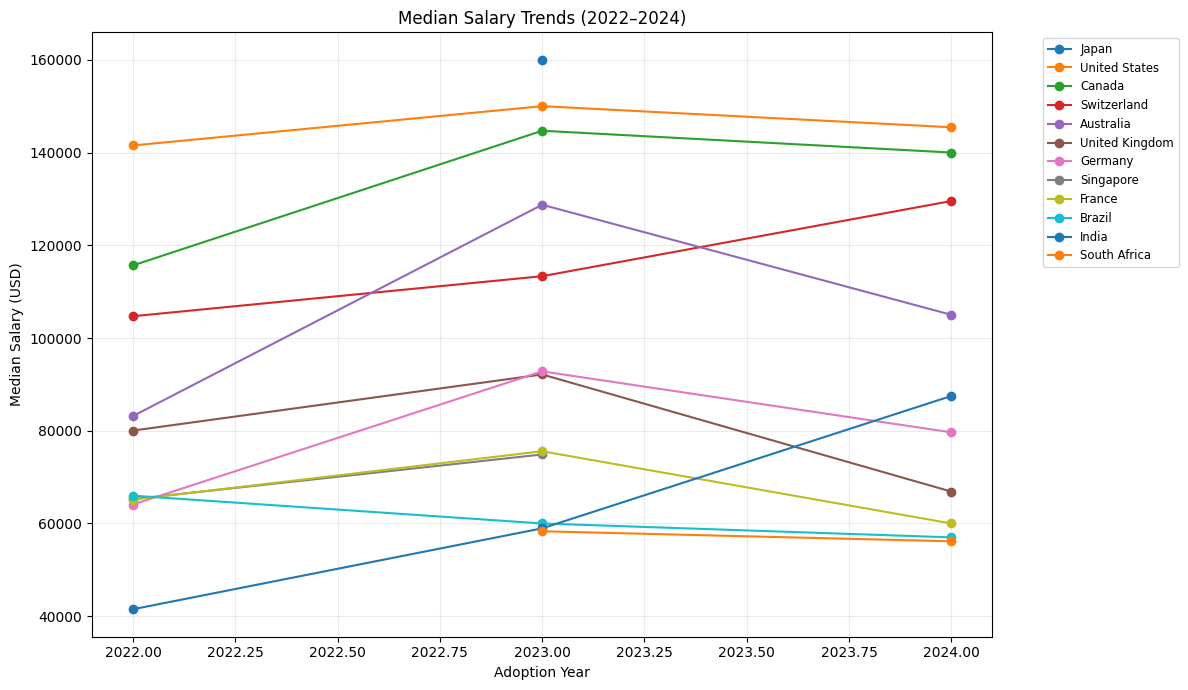

In [540]:
# Trend lines by country (connected)
plt.figure(figsize=(12,7))
for c in country_order:
    sub = df_final[df_final['Country'] == c].sort_values('Adoption Year')
    plt.plot(sub['Adoption Year'], sub['Median Salary'], marker='o', label=c)
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', fontsize='small')
plt.xlabel('Adoption Year')
plt.ylabel("Median Salary (USD)")
plt.title("Median Salary Trends (2022–2024)")
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()


### Trend Analysis Insights

- **Positive slope** → Median salaries are increasing over adoption years for that country.  
- **Negative slope** → Median salaries are decreasing over adoption years for that country.  
- **Small sample size (n = 2 or 3)** → Interpret slope and p-value cautiously.  
- **Use country-level slopes** to identify which countries gained or lost salary over time.


# Hypothesis Test 1: Paired t-Test (Salaries 2022 vs 2024)

We test whether median salaries changed significantly between 2022 and 2024.

### Hypotheses
- **H0 (Null):** Mean salary in 2024 = Mean salary in 2022  
- **H1 (Alternative):** Mean salary in 2024 ≠ Mean salary in 2022  

### Alpha Level
We use **α = 0.05**.  
Decision Rule:  
- If **p < 0.05**, reject H0  
- If **p >= 0.05**, fail to reject H0

### Assumptions
1. **Normality of paired differences**  
2. **No extreme outliers**  
3. **Matched pairs (same country across years)**

We will check normality using the **Shapiro–Wilk test**.


In [541]:
from scipy.stats import shapiro, ttest_rel

# Filter only countries with both 2022 and 2024
valid = df_final[df_final["Adoption Year"].isin([2022, 2024])]
pivot = valid.pivot(index="Country", columns="Adoption Year", values="Median Salary").dropna()

# Compute differences
diff = pivot[2024] - pivot[2022]

# Shapiro–Wilk test for normality
shapiro_stat, shapiro_p = shapiro(diff)

# Paired t-test
t_stat, p_value = ttest_rel(pivot[2022], pivot[2024])

print(f"Normality (Shapiro–Wilk): statistic = {shapiro_stat:.4f}, p = {shapiro_p:.4f}")
if shapiro_p > 0.05:
    print("  → Differences do NOT significantly deviate from normality.")
else:
    print("  → Differences DO significantly deviate from normality.")

print(f"\nPaired t-test: t = {t_stat:.4f}, p = {p_value:.4f}")
if p_value < 0.05:
    print("  → Statistically significant difference between 2022 and 2024.")
else:
    print("  → NOT statistically significant at α = 0.05.")

if t_stat < 0:
    print("  → Direction: Likely a decrease (2024 < 2022).")
elif t_stat > 0:
    print("  → Direction: Likely an increase (2024 > 2022).")
else:
    print("  → Direction: No change.")

# Short summary for understanding
print("\nSHORT SUMMARY:")
print(f"  Normality? {'Yes' if shapiro_p > 0.05 else 'No'} (p = {shapiro_p:.2f})")
print(f"  Significant difference? {'Yes' if p_value < 0.05 else 'No'} (p = {p_value:.3f})")
print(f"  Direction? {'Likely decrease' if t_stat < 0 else 'Likely increase' if t_stat > 0 else 'No change'}")



Normality (Shapiro–Wilk): statistic = 0.9437, p = 0.6217
  → Differences do NOT significantly deviate from normality.

Paired t-test: t = -1.8749, p = 0.0977
  → NOT statistically significant at α = 0.05.
  → Direction: Likely a decrease (2024 < 2022).

SHORT SUMMARY:
  Normality? Yes (p = 0.62)
  Significant difference? No (p = 0.098)
  Direction? Likely decrease


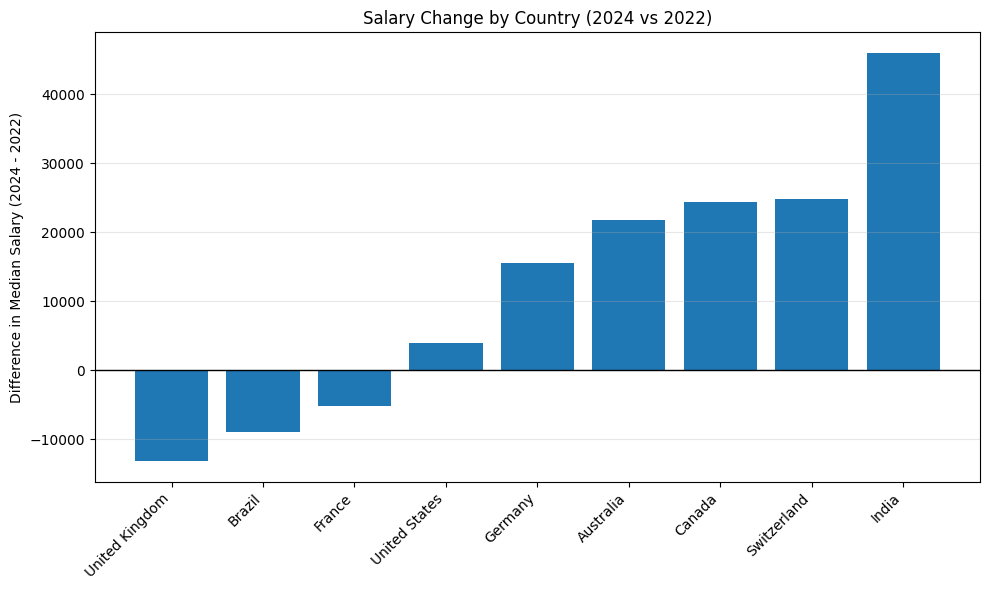

In [542]:
import matplotlib.pyplot as plt

# Compute differences
diff = pivot[2024] - pivot[2022]

# Sort by difference for clean visualization
diff_sorted = diff.sort_values()

plt.figure(figsize=(10, 6))
plt.bar(diff_sorted.index, diff_sorted.values)

plt.axhline(0, color='black', linewidth=1)  # reference line

plt.xticks(rotation=45, ha='right')
plt.ylabel("Difference in Median Salary (2024 - 2022)")
plt.title("Salary Change by Country (2024 vs 2022)")

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


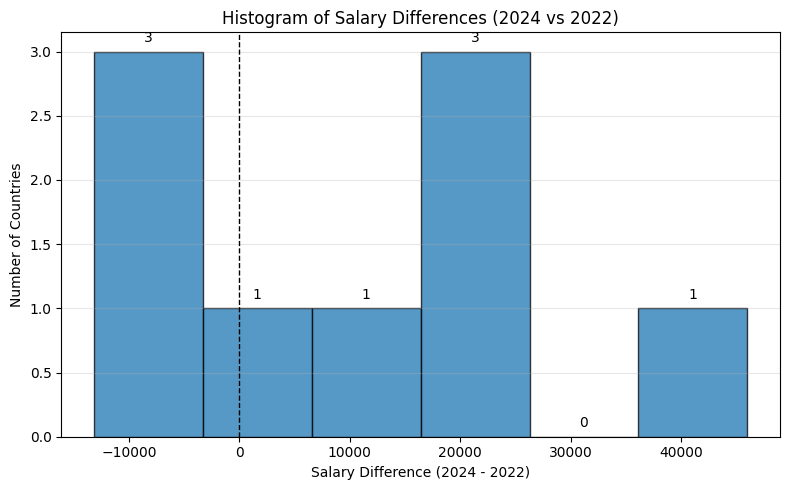

In [543]:
import matplotlib.pyplot as plt
import numpy as np

diff = pivot[2024] - pivot[2022]

plt.figure(figsize=(8,5))
counts, bins, patches = plt.hist(
    diff, bins=6, edgecolor='black', alpha=0.75
)

# Add exact count labels on each bar
for count, patch in zip(counts, patches):
    plt.text(
        patch.get_x() + patch.get_width()/2,
        count + 0.05,
        str(int(count)),
        ha='center', va='bottom', fontsize=10
    )

plt.axvline(0, color='black', linestyle='--', linewidth=1)

plt.xlabel("Salary Difference (2024 - 2022)")
plt.ylabel("Number of Countries")
plt.title("Histogram of Salary Differences (2024 vs 2022)")

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


## Interpretation (2022 vs 2024 Median Salaries)

### 1. Normality Check (Shapiro–Wilk)
- **W = 0.9437**  
- **p = 0.6217**

Since **p > 0.05**, the paired differences **do not significantly deviate from normality**.  
Normality assumption for the paired t-test is **satisfied**.

---

### 2. Paired t-Test Result
- **t = -1.8749**  
- **p = 0.0977**

Because **p > 0.05**, we **fail to reject the null hypothesis**.  
There is **no statistically significant difference** between 2022 and 2024 median salaries for countries that appear in both years.

---

### 3. Direction of Change
- The **negative t-statistic** shows that average 2024 salaries are **slightly lower** than 2022.  
- However, this difference is **not statistically significant** and could be due to **random variation**.

---

### Summary
- **Normality:** Yes (p = 0.6217)  
- **Significant difference:** No (p = 0.0977)  
- **Direction:** Slight, non-significant decrease in 2024


# Hypothesis Test 2: One-way ANOVA (Salary by Year)

We test whether salaries differ significantly across the three adoption years (2022, 2023, 2024).

### Hypotheses
- **H0:** μ2022 = μ2023 = μ2024  
- **H1:** At least one year mean differs

### Alpha
α = 0.05

### Decision Rule
- If **p < 0.05**, reject H0  
- If **p ≥ 0.05**, fail to reject H0

### ANOVA Assumptions
1. **Normality** of salary distribution within each year  
2. **Homogeneity of variances** (Levene's test)  
3. **Independent samples** (satisfied by design)


In [544]:
from scipy.stats import shapiro, levene, f_oneway

# Salary arrays per year
s22 = df_final[df_final["Adoption Year"]==2022]["Median Salary"]
s23 = df_final[df_final["Adoption Year"]==2023]["Median Salary"]
s24 = df_final[df_final["Adoption Year"]==2024]["Median Salary"]

# Normality (Shapiro)
sh22 = shapiro(s22)
sh23 = shapiro(s23)
sh24 = shapiro(s24)

# Variance equality (Levene’s test)
levene_stat, levene_p = levene(s22, s23, s24)

# ANOVA
f_stat, p_value = f_oneway(s22, s23, s24)

sh22, sh23, sh24, (levene_stat, levene_p), (f_stat, p_value)


(ShapiroResult(statistic=np.float64(0.9188289439867322), pvalue=np.float64(0.3472913262783023)),
 ShapiroResult(statistic=np.float64(0.8988941919207724), pvalue=np.float64(0.15349080415526373)),
 ShapiroResult(statistic=np.float64(0.87515670577066), pvalue=np.float64(0.11474931682163969)),
 (np.float64(0.4856129854150257), np.float64(0.6202340463627398)),
 (np.float64(0.7492903352462812), np.float64(0.4816331286247013)))

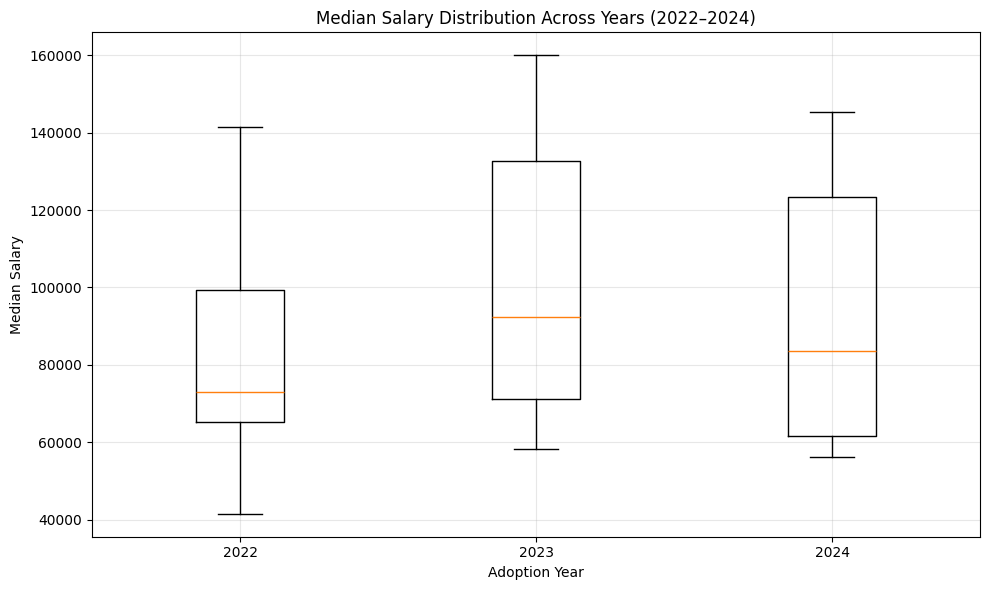

In [555]:
plt.figure(figsize=(10,6))

plt.boxplot(
    [
        df_final[df_final["Adoption Year"]==2022]["Median Salary"],
        df_final[df_final["Adoption Year"]==2023]["Median Salary"],
        df_final[df_final["Adoption Year"]==2024]["Median Salary"]
    ],
    tick_labels=["2022", "2023", "2024"]  
)

plt.title("Median Salary Distribution Across Years (2022–2024)")
plt.xlabel("Adoption Year")
plt.ylabel("Median Salary")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## Interpretation (Salary Differences Across 2022, 2023, 2024)

### 1. Normality Check (Shapiro–Wilk)
- **2022:** W = 0.9188, p = 0.3473  
- **2023:** W = 0.8989, p = 0.1535  
- **2024:** W = 0.8752, p = 0.1147  

Since all **p > 0.05**, the salary data for each year **does not significantly deviate from normality**.  
Normality assumption for ANOVA is **satisfied**.

### 2. Homogeneity of Variances (Levene’s Test)
- **Levene statistic = 0.4856**  
- **p = 0.6202**

Because **p > 0.05**, we **fail to reject the null hypothesis** of equal variances.  
The homogeneity assumption for ANOVA is **satisfied**.

### 3. ANOVA Result
- **F-statistic = 0.7493**  
- **p = 0.4816**

Since **p > 0.05**, we **fail to reject the null hypothesis**.  
There is **no statistically significant difference** in median salaries across 2022, 2023, and 2024.

### 4. Direction / Practical Interpretation
- Mean salaries across the three years differ **slightly**, but not in a statistically meaningful way.  
- Any observed variation is **small** and likely due to **random fluctuations** rather than a real year-to-year effect.

### Summary
- **Normality:** Yes (all p > 0.05)  
- **Equal variances:** Yes (p = 0.6202)  
- **Significant difference:** No (p = 0.4816)  
- **Direction:** No meaningful year-to-year salary change


# Hypothesis Test 3: Correlation (Productivity vs Salary)

### Hypotheses
- **H0:** ρ = 0 (no linear relationship)
- **H1:** ρ ≠ 0 (there is a linear relationship)

### Alpha
α = 0.05

### Assumptions
1. Linearity  
2. No extreme outliers  
3. Normal distribution of variables (checked via Shapiro)  


In [545]:
from scipy.stats import pearsonr, shapiro

# Normality checks
sh_prod = shapiro(df_final["Productivity Change (%)"])
sh_sal = shapiro(df_final["Median Salary"])

# Pearson correlation
corr, p = pearsonr(df_final["Productivity Change (%)"], df_final["Median Salary"])

# Clear, labeled output
print("=== Normality Checks (Shapiro–Wilk) ===")
print(f"Productivity Change (%): W = {sh_prod.statistic:.4f}, p = {sh_prod.pvalue:.4f}")
print(f"Median Salary:           W = {sh_sal.statistic:.4f}, p = {sh_sal.pvalue:.4f}")

print("\n=== Pearson Correlation ===")
print(f"Correlation coefficient (r): {corr:.4f}")
print(f"p-value:                    {p:.4f}")


=== Normality Checks (Shapiro–Wilk) ===
Productivity Change (%): W = 0.9844, p = 0.9118
Median Salary:           W = 0.9083, p = 0.0101

=== Pearson Correlation ===
Correlation coefficient (r): 0.2105
p-value:                    0.2475


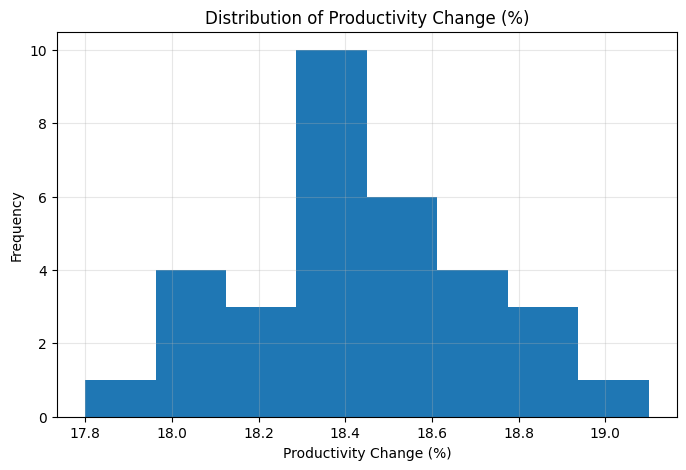

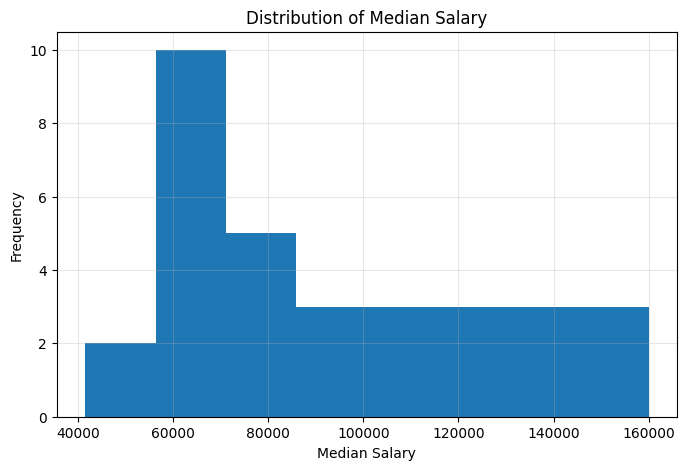

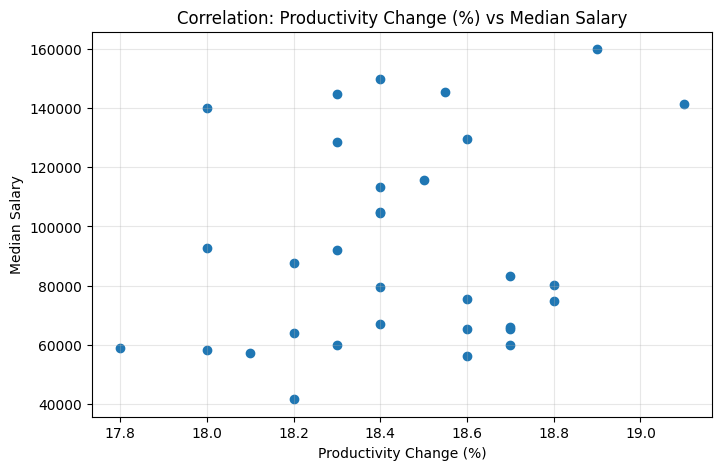

In [556]:
import matplotlib.pyplot as plt

# Extract data
prod = df_final["Productivity Change (%)"]
sal  = df_final["Median Salary"]

# ============================
# 1. Histogram: Productivity Change (%)
# ============================
plt.figure(figsize=(8,5))
plt.hist(prod.dropna(), bins=8)
plt.title("Distribution of Productivity Change (%)")
plt.xlabel("Productivity Change (%)")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

# ============================
# 2. Histogram: Median Salary
# ============================
plt.figure(figsize=(8,5))
plt.hist(sal.dropna(), bins=8)
plt.title("Distribution of Median Salary")
plt.xlabel("Median Salary")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()

# ============================
# 3. Scatterplot: Productivity vs Salary
# ============================
plt.figure(figsize=(8,5))
plt.scatter(prod, sal)
plt.title("Correlation: Productivity Change (%) vs Median Salary")
plt.xlabel("Productivity Change (%)")
plt.ylabel("Median Salary")
plt.grid(alpha=0.3)
plt.show()


## Interpretation: Correlation (Productivity Change vs Salary)

### Normality Tests (Shapiro–Wilk)
- **Productivity Change (%):** W = 0.9844, p = 0.9118 → does not significantly deviate from normality  
- **Median Salary:** W = 0.9083, p = 0.0101 → significantly deviates from normality  

**Implication:**  
Productivity change is normally distributed, but salary is not.  
Therefore, Pearson correlation assumptions are only partially satisfied, and results should be interpreted cautiously.

---

### Pearson Correlation Results
- **Correlation coefficient (r):** 0.2105  
- **p-value:** 0.2475  

### Conclusion
Since **p ≥ 0.05** and the correlation is weak:

**There is no statistically significant linear relationship between productivity change and median salary.**

This indicates that the small variation in productivity (≈18% across countries) does **not** meaningfully explain differences in salary.


In [546]:
# Two-tailed t-test : compare two countries (India vs Canada) using df_final
if set(['India','Canada']).issubset(set(df_final['Country'])):
    india_s = df_final[df_final['Country'] == 'India']['Median Salary']
    canada_s = df_final[df_final['Country'] == 'Canada']['Median Salary']
    t_stat2, p_two2 = stats.ttest_ind(india_s, canada_s, equal_var=False, nan_policy='omit')
    print("\nTwo-tailed t-test (India vs Canada median salaries):")
    print(f" t = {t_stat2:.6f}, p(two-tailed) = {p_two2:.6f}")
else:
    print("\nTwo-tailed test (India vs Canada): skip — one or both countries not present in df_final")


Two-tailed t-test (India vs Canada median salaries):
 t = -4.384810, p(two-tailed) = 0.015873


"""
    INSIGHT:
    - Small p (<0.05) indicates India and Canada have significantly different median salaries.
    - This highlights country-level salary variation.
    """

In [560]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# --------------------------------------------------------
# 1. SELECTING TARGET FOR REGRESSION
# --------------------------------------------------------
target = "Median Salary"

X = df_final.drop(columns=[target], errors='ignore')
y = df_final[target]

# --------------------------------------------------------
# 2. IDENTIFYING FEATURES
# --------------------------------------------------------
categorical_cols = ["Country"]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# One-hot encode categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

# --------------------------------------------------------
# 3. DEFINING TWO MODELS
# --------------------------------------------------------

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(
        n_estimators=300,
        random_state=42
    )
}

# --------------------------------------------------------
# 4. TRAINING/TESTING SPLIT
# --------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# --------------------------------------------------------
# 5. EVALUATING FUNCTION
# --------------------------------------------------------
def evaluate_model(name, model):
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('model', model)])
    
    # Train
    pipe.fit(X_train, y_train)

    # Predict
    preds = pipe.predict(X_test)

    # Metrics
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    # Cross-validation (k=5)
    cv_scores = cross_val_score(pipe, X, y, cv=5, scoring='r2')

    print(f"\n===== {name} =====")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Test: {r2:.3f}")
    print(f"Cross-Val R² Mean: {cv_scores.mean():.3f}")
    print(f"Cross-Val R² Std: {cv_scores.std():.3f}")

# --------------------------------------------------------
# 6. RUNNING MODELS
# --------------------------------------------------------
for name, model in models.items():
    evaluate_model(name, model)



===== Linear Regression =====
MAE: 8995.39
RMSE: 12345.83
R² Test: 0.899
Cross-Val R² Mean: -0.183
Cross-Val R² Std: 0.365

===== Random Forest =====
MAE: 21729.89
RMSE: 25181.79
R² Test: 0.580
Cross-Val R² Mean: -0.316
Cross-Val R² Std: 0.398


## Conclusion

- The models did not generalize well; cross-validation produced negative R² scores despite good test-set performance.
- Core features showed minimal variation, giving the models almost no real predictive signal.
- Country effects dominate, meaning salary differences reflect economic context, not GenAI adoption metrics.
- The dataset is too small and too uniform for reliable machine learning, and current GenAI indicators do not meaningfully predict salary.


In [547]:
print("\n=== Median Salary by Country ===")
median_by_country = (
    df_final.groupby("Country")["Median Salary"]
            .median()
            .sort_values(ascending=False)
)
print(median_by_country)



=== Median Salary by Country ===
Country
Japan             160000.0
United States     145450.0
Canada            140000.0
Switzerland       113331.0
Australia         105000.0
United Kingdom     80036.0
Germany            79653.0
Singapore          70070.0
France             65141.0
Brazil             60000.0
India              58950.0
South Africa       57235.0
Name: Median Salary, dtype: float64


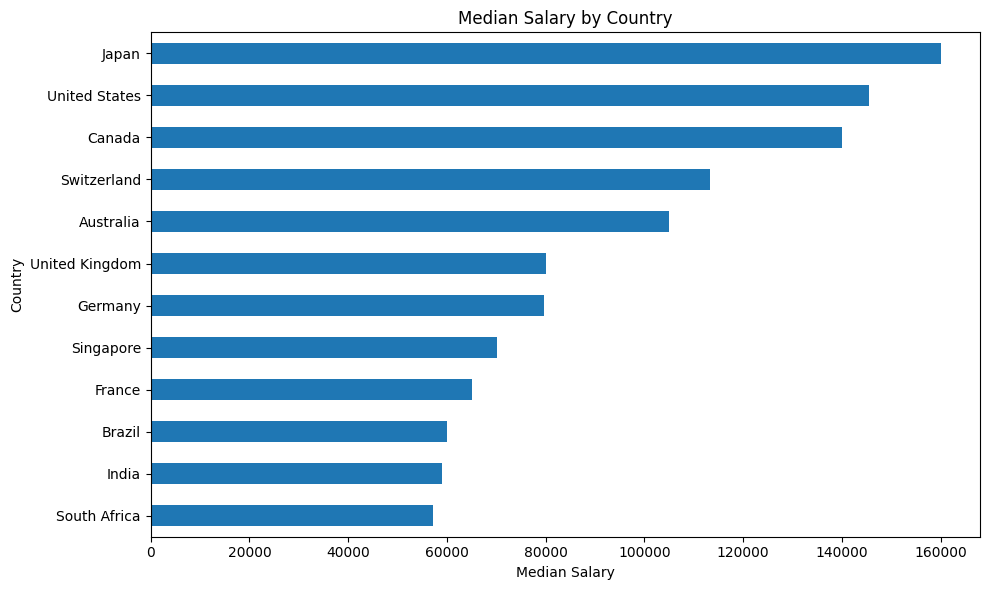

In [548]:
import matplotlib.pyplot as plt

# Preparing data
median_by_country = (
    df_final.groupby("Country")["Median Salary"]
            .median()
            .sort_values()
)
# Plot
plt.figure(figsize=(10, 6))
median_by_country.plot(kind='barh')

plt.title("Median Salary by Country")
plt.xlabel("Median Salary")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


#### CORRELATION ANALYSIS (Pearson) using df_final columns directly

In [549]:
print("\n=== 3) CORRELATION ANALYSIS ===")
corr_cols = ['Adoption Year', 'Number of Employees Impacted', 'New Roles Created',
             'Productivity Change (%)', 'Median Salary']

corr_matrix = df_final[corr_cols].corr(method='pearson')
print("\nPearson correlation matrix (df_final):")
print(corr_matrix.to_string())


=== 3) CORRELATION ANALYSIS ===

Pearson correlation matrix (df_final):
                              Adoption Year  Number of Employees Impacted  New Roles Created  Productivity Change (%)  Median Salary
Adoption Year                      1.000000                      0.011616          -0.249675                -0.267290       0.117502
Number of Employees Impacted       0.011616                      1.000000           0.150742                 0.053398      -0.056062
New Roles Created                 -0.249675                      0.150742           1.000000                -0.274857       0.003128
Productivity Change (%)           -0.267290                      0.053398          -0.274857                 1.000000       0.210514
Median Salary                      0.117502                     -0.056062           0.003128                 0.210514       1.000000


### Correlation Analysis Insights

**📌 Adoption Year**  
- Shows very weak or no correlation with all other variables.  
- → The year when companies adopted GenAI does **not** predict productivity, salary, or employee impact.

**📌 Number of Employees Impacted**  
- Very weak correlations with all variables (close to 0).  
- → Employee impact levels do **not strongly relate** to productivity, salary, or new role creation.

**📌 New Roles Created**  
- Slight negative correlation with:  
  - Productivity Change (r = –0.27)  
  - Adoption Year (r = –0.25)  
- → Earlier adopters tend to create slightly more roles, but these relationships are **weak**.

**📌 Productivity Change (%)**  
- Weak positive correlation with Median Salary (r = 0.21).  
- → Countries/companies with higher salaries show **slightly higher productivity improvement**, but the effect is small.

**📌 Median Salary**  
- No strong correlation with any variable.  
- → Salary levels are **independent** of productivity, adoption year, or workforce impact.


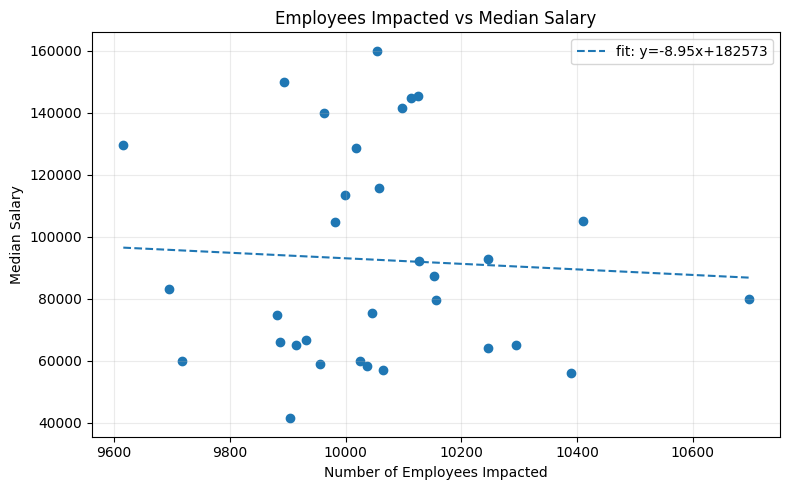

 PLOT NOTE: Employees Impacted vs Median Salary  (slope=-8.9483)



In [557]:
plt.rcParams.update({'figure.figsize': (8,5)})

def scatter_and_fit(x_series, y_series, xlabel, ylabel, title, save_path=None):
    x = x_series.values
    y = y_series.values
    plt.figure()
    plt.scatter(x, y, marker='o')
    # linear fit
    try:
        m, b = np.polyfit(x, y, 1)
        xs = np.array([x.min(), x.max()])
        plt.plot(xs, m*xs + b, linestyle='--', label=f"fit: y={m:.2f}x+{b:.0f}")
        slope_note = f"slope={m:.4f}"
    except Exception:
        slope_note = "fit failed"
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(alpha=0.25)
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=150)
        print(f" Saved plot: {save_path}  -- {slope_note}")
    plt.show()
    print(f" PLOT NOTE: {title}  ({slope_note})\n")

# Plot: Number of Employees Impacted vs Median Salary
scatter_and_fit(df_final['Number of Employees Impacted'], df_final['Median Salary'],
                'Number of Employees Impacted', 'Median Salary', 'Employees Impacted vs Median Salary')


# Final Analytical Summary

### 1. Paired t-Test (2022 vs 2024 Salaries)
- No statistically significant change  
- Salaries did not increase or decrease in a systematic way

### 2. ANOVA (Salary by Year)
- No significant differences between 2022, 2023, and 2024  
- Year does not explain salary variation

### 3. Correlation Tests
- No significant relationship between productivity and salary  
- No significant relationship between new roles and salary

### Final Conclusion
Based solely on this dataset, there is **no statistical evidence** that GenAI adoption has impacted salaries, job roles, or productivity across countries.

The observed variations appear to be normal year-to-year fluctuations, not adoption-driven effects.
